# Housing Price Prediction

## Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## <font color= green> Notebook Walkthrough:
#### 1. [Data view at a glance.](#data_view)
#### 2. [Exploratory Data Analysis.](#eda)
#### 3. [Treating outliers and Missing Values.](#miss_val)
#### 4. [Feature Engineering.](#feature_engg)
#### 5. [Building Models.](#model_build)
#### 6. [Comparing Models.](#model_compare)
#### 7. [Final Interpretation and Results.](#result_inter)

#### ------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
##Importing essential data manipulation libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
## Importing model building libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [3]:
## Importing warning supression
import warnings
warnings.filterwarnings("ignore")

## 1. Data view at a glance. <a id='data_view'></a>

#### Data variables definition:
https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt

In [4]:
## Load the csv file
house = pd.read_csv('../train.csv',keep_default_na=False) #argument to prevent NA being read as NaN

## View the first five rows
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [5]:
house.shape

(1460, 81)

1460 rows x 81 columns

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null


### Data View - Categorical Variables:

In [7]:
house.select_dtypes(include = 'object').columns

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

> Some of the above are wrongly rooted as categorical variables like `LotFrontage` ,`MasVnrArea` due to the presence of `NA` in the rows for the respective columns.<br><br>
`LotFrontage` ,`MasVnrArea` - <b>Numeric Type</b> <br>

>#### Aside above, there are variables qualified in the dataset as Numerical but are actually categorical:
`MSSubClass, OverallQual, OverallCond`

#### Categorical ----> Numeric conversion

In [8]:
## Convert two columns to 'numeric' type as mentioned above
house['LotFrontage'] = pd.to_numeric(house['LotFrontage'], errors='coerce')
house['MasVnrArea'] = pd.to_numeric(house['MasVnrArea'], errors='coerce')

#### Numeric ----> Categorical conversion

In [9]:
## Convert three columns to 'object' type as mentioned above
house[['MSSubClass', 'OverallQual', 'OverallCond']] = house[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [10]:
## Checking the converted types
house.select_dtypes(include='object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

Note: We can eliminate 'Id' from the database too since it does not contribute to the analysis

In [11]:
house.drop(columns='Id',axis=1,inplace=True)

### Data View - Numeric Variables

To assess the distribution of each numeric variables, we must find which medians are the farthese from the mean (Data Skew)

In [12]:
house_num_ = pd.concat([house.describe().loc['mean'],house.describe().loc['50%']],axis=1)

In [13]:
house_num_['Diff'] = house_num_['mean'] - house_num_['50%']
house_num_.sort_values(by = 'Diff',ascending=False).head()

,mean,50%,Diff
SalePrice,180921.195890,163000.0,17921.195890
LotArea,10516.828082,9478.5,1038.328082
2ndFlrSF,346.992466,0.0,346.992466
MasVnrArea,103.685262,0.0,103.685262
WoodDeckSF,94.244521,0.0,94.244521


> Variables above are skewed

### Check Missing Values (Will treat them later)

<AxesSubplot:>

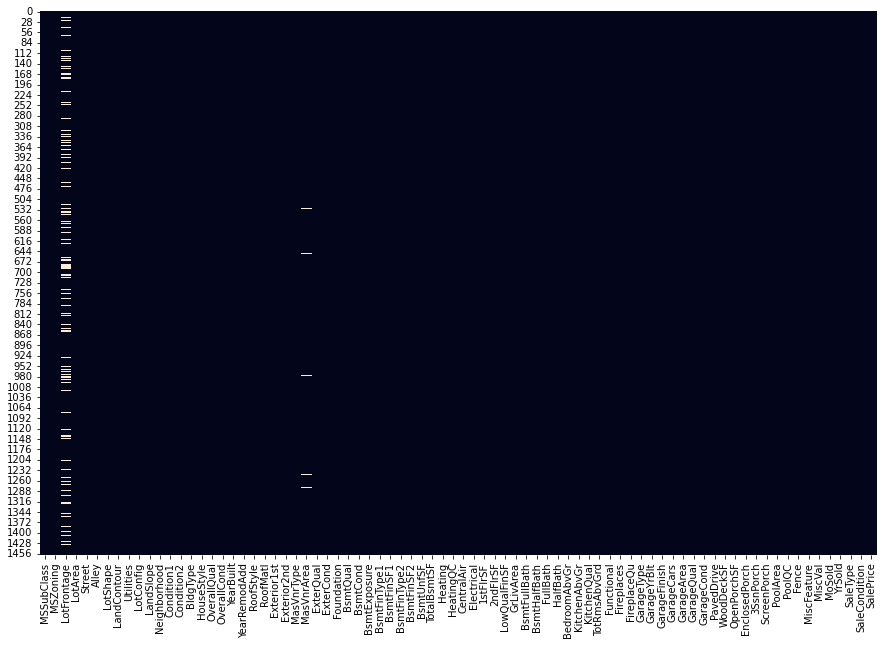

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(house.isna(),cbar=False)

2 Columns happen to have missing values, namely `LotFrontage` and `MasVnrArea`

## -----------------------------------------------------------------------------------------------------------

## 2. Exploratory Data Analysis. <a id='eda'></a>

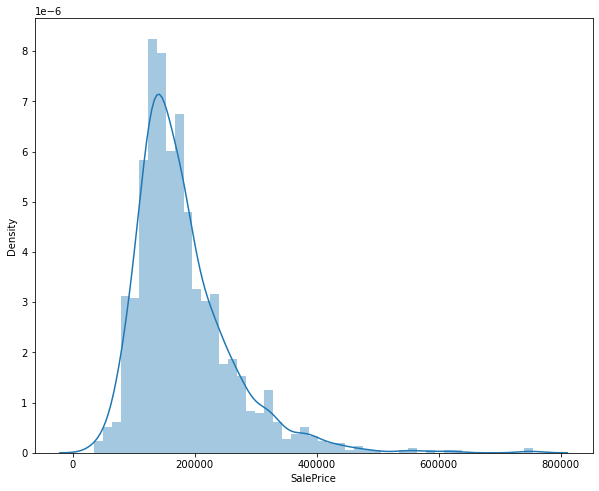

In [15]:
# Target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.distplot(house['SalePrice'])
plt.show()

In [16]:
#Analyze Skewness
house['SalePrice'].skew()

1.8828757597682129

> Skewness >1 implies a variable treatment
>> Different methods are available for skew treatment such as, <b>log Transform, Square Root Transform, Box-Cox Transform</b>

In [17]:
##Log Transform
house['SalePrice'] = np.log(house['SalePrice'])

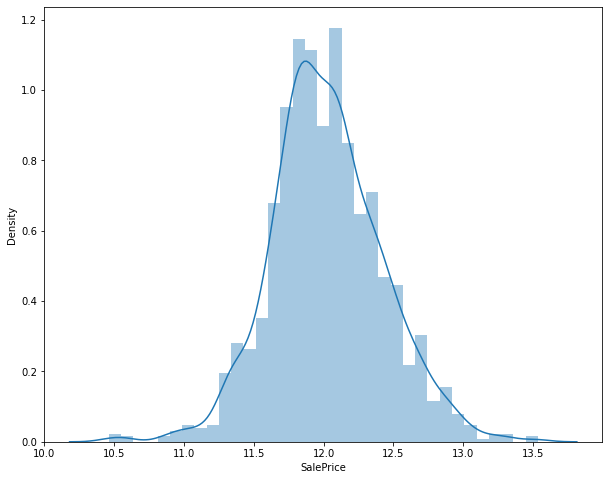

In [18]:
#Plotting the transformed variables
plt.figure(figsize=[10,8])
sns.distplot(house['SalePrice'])
plt.show()

The variable is normally distribute now, there is no visible skew hence we can go ahead with our analyses

### EDA - Categorical variables

In [19]:
house_obj = house.select_dtypes(include='object')

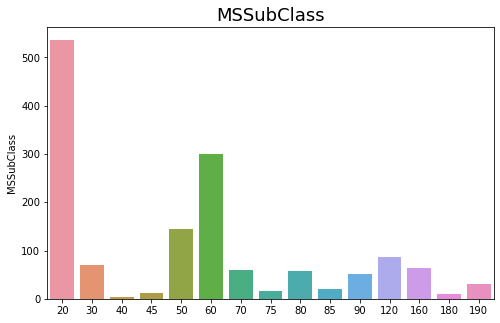

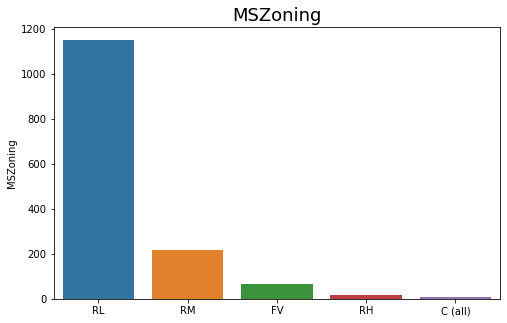

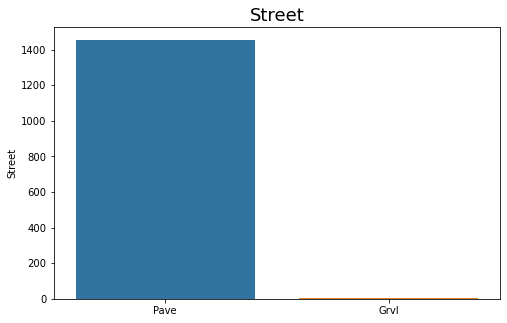

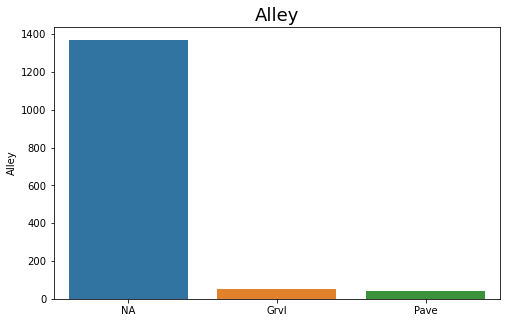

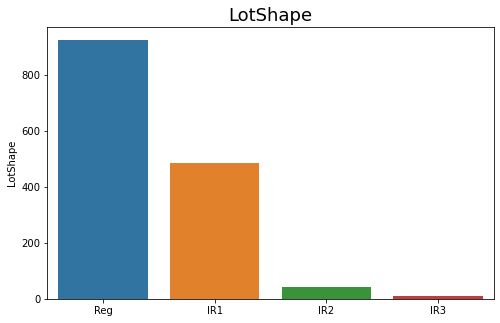

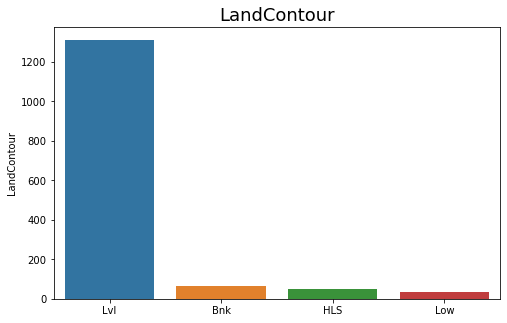

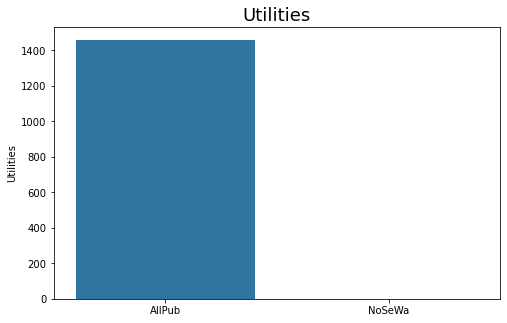

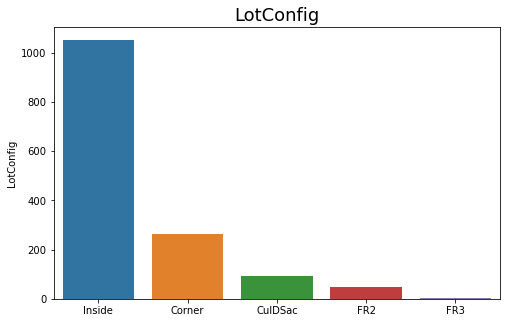

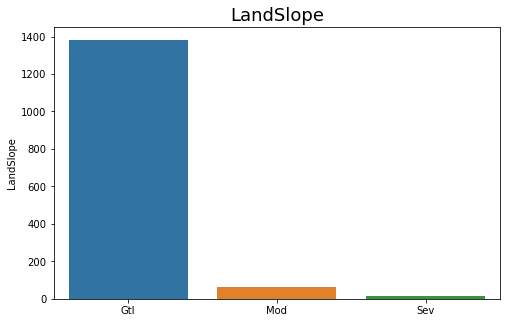

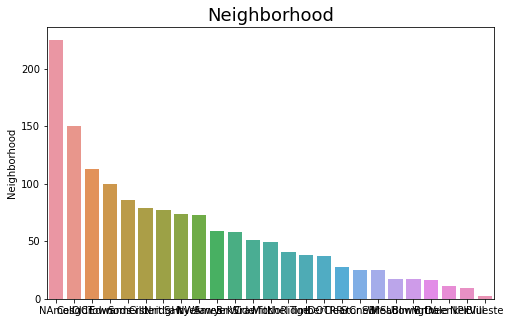

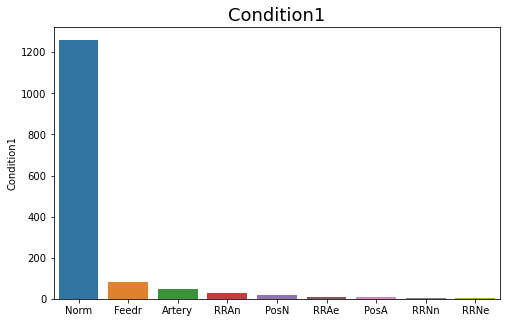

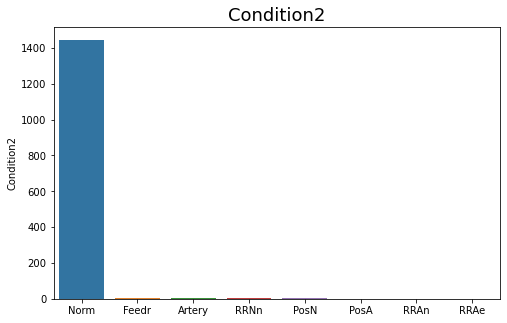

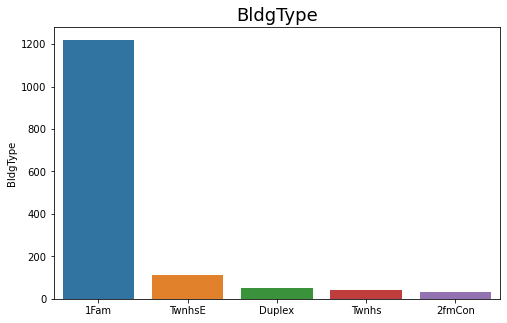

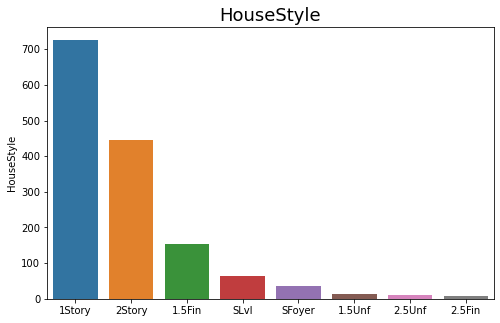

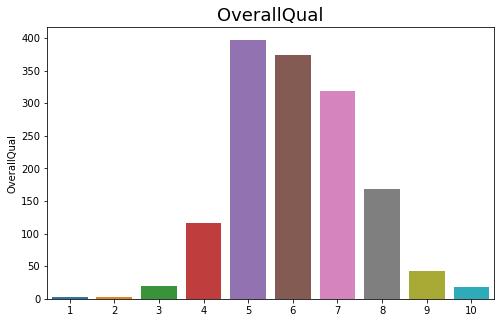

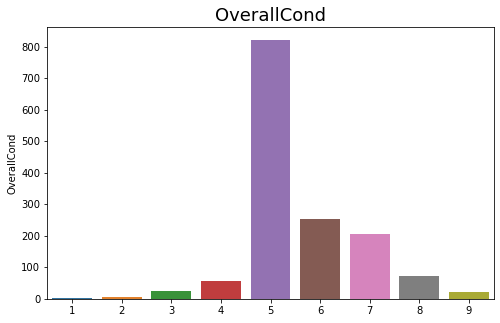

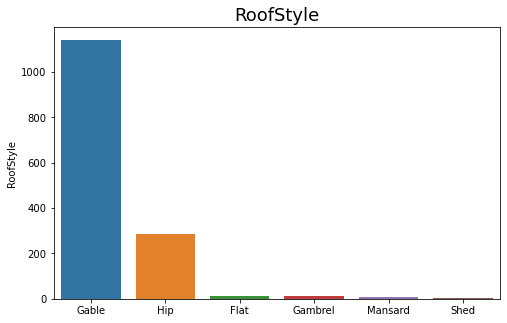

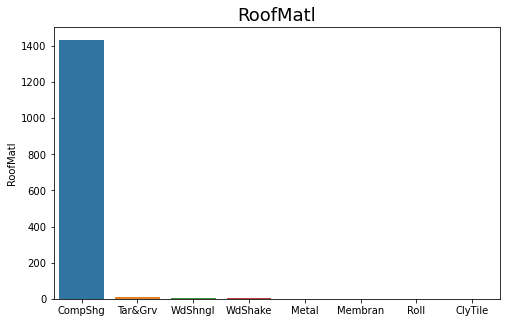

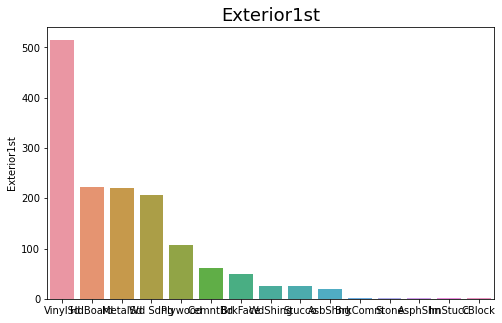

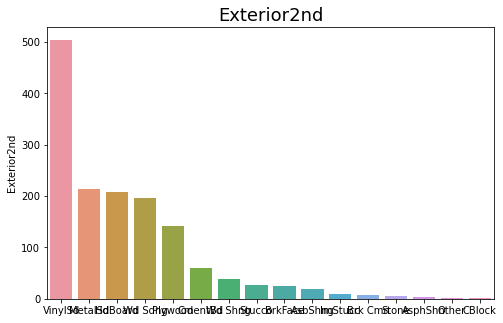

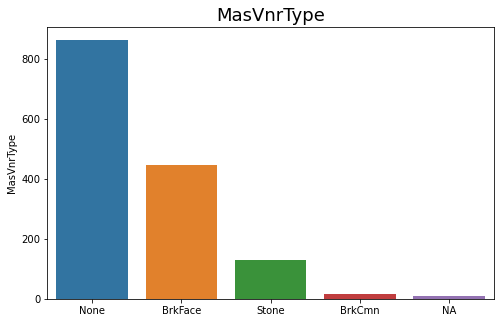

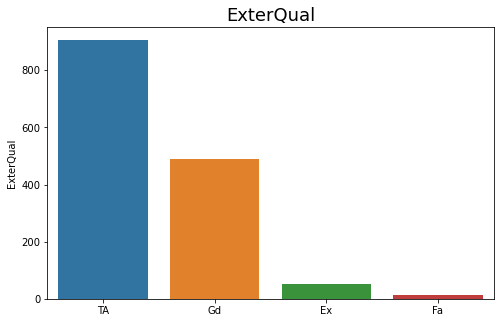

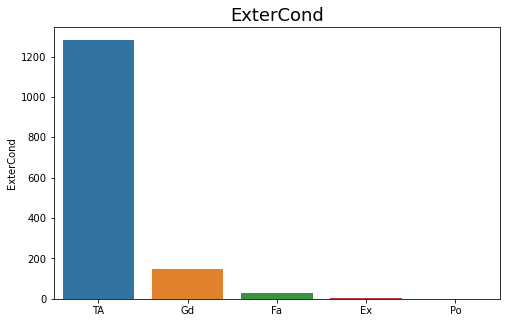

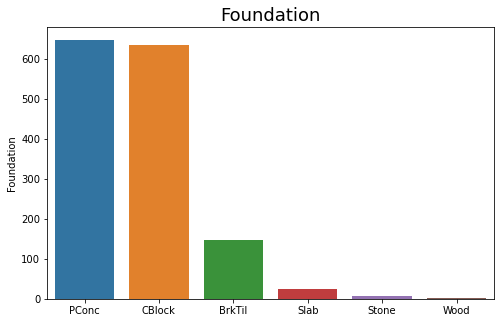

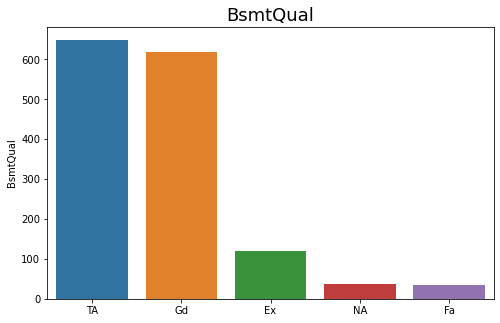

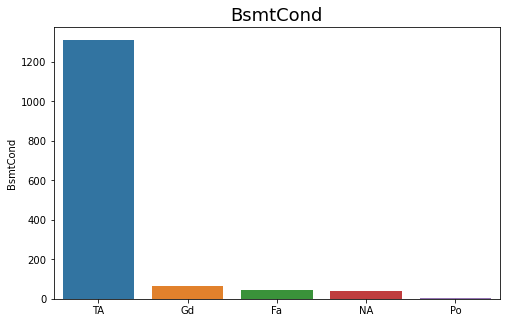

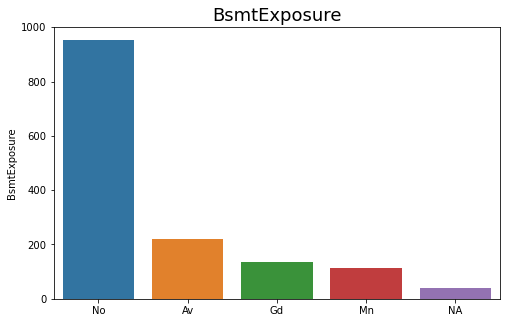

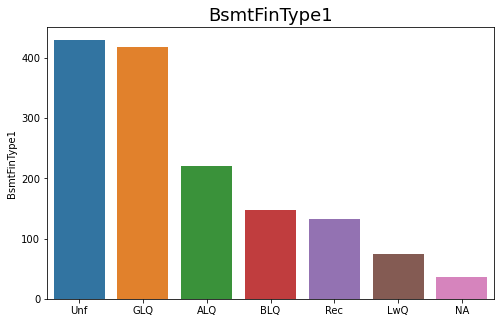

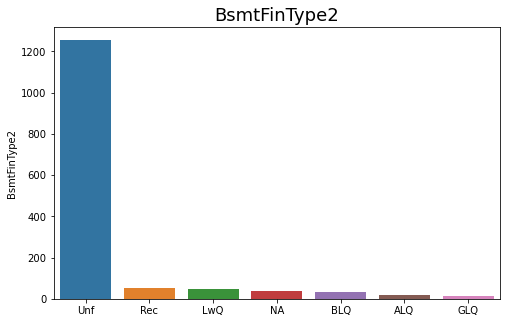

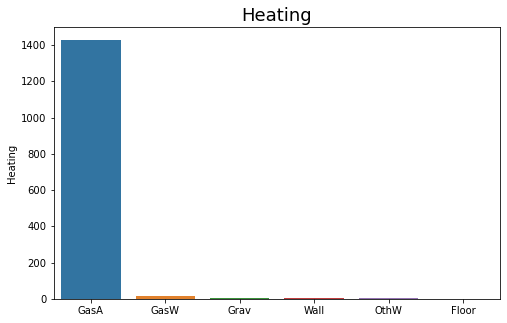

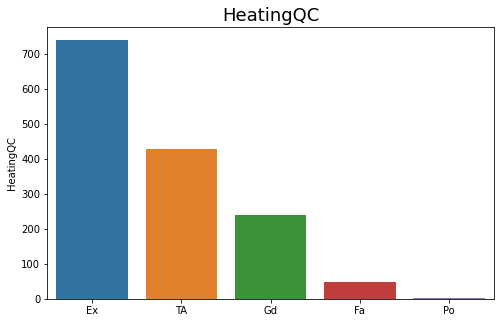

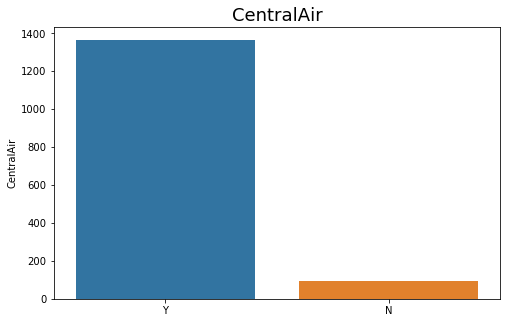

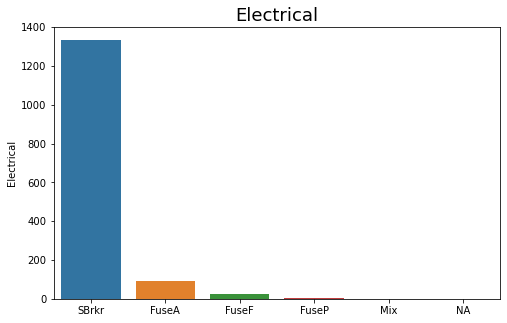

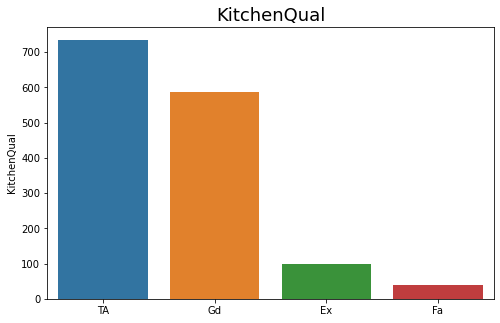

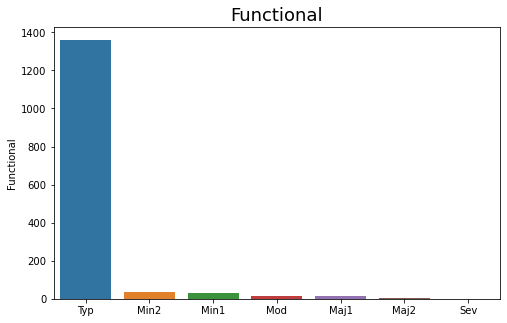

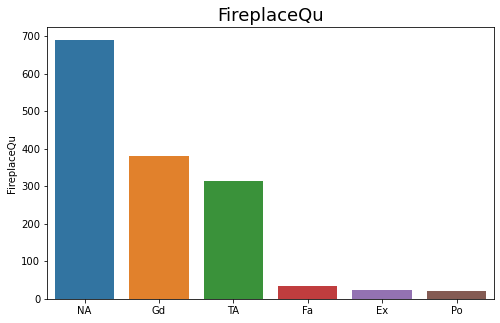

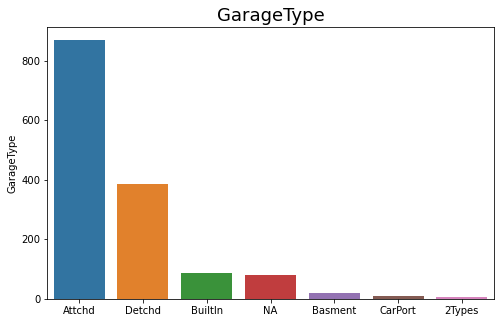

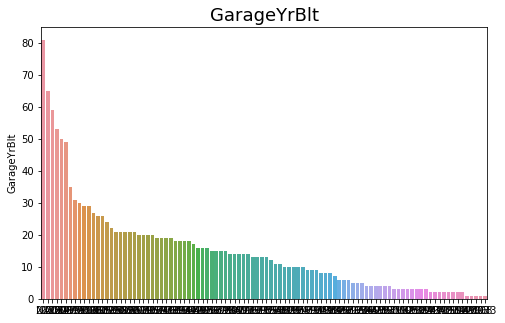

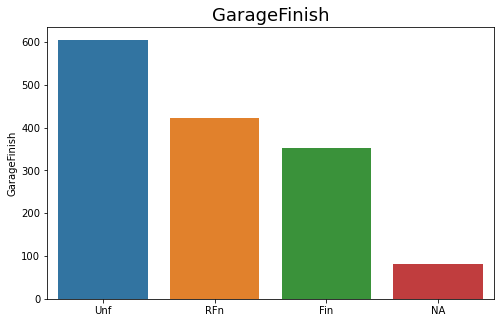

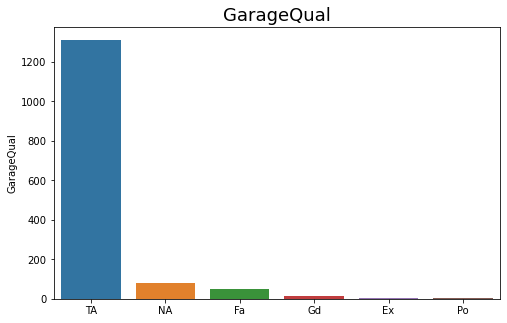

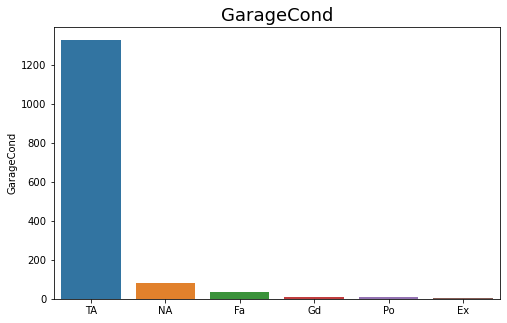

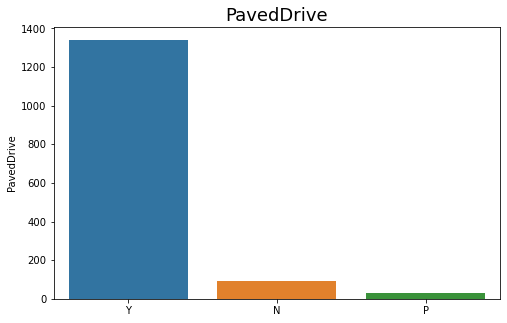

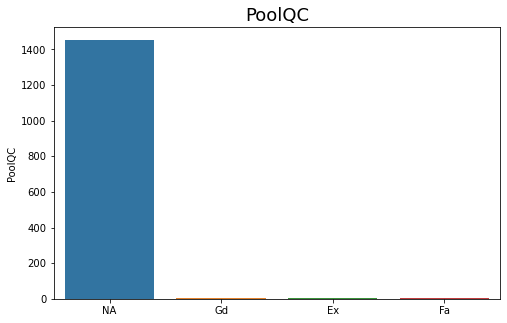

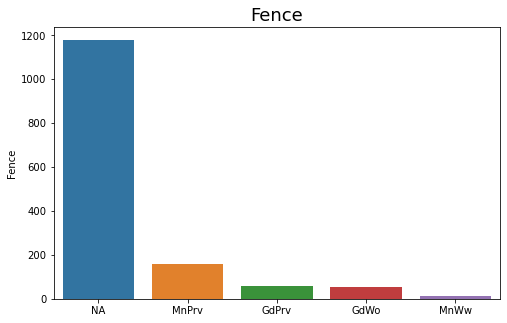

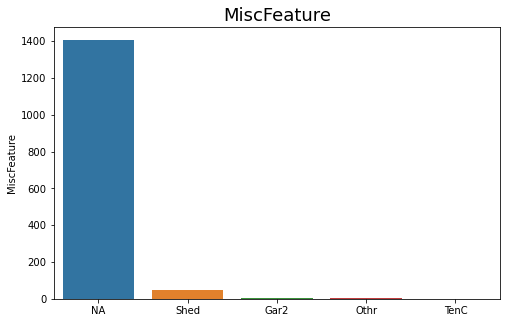

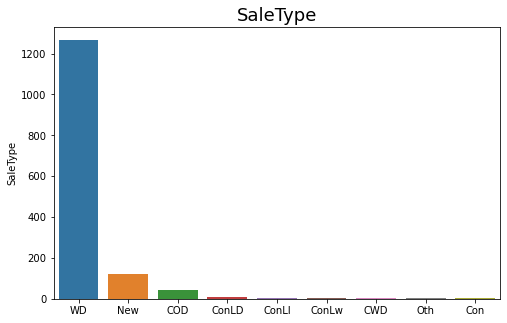

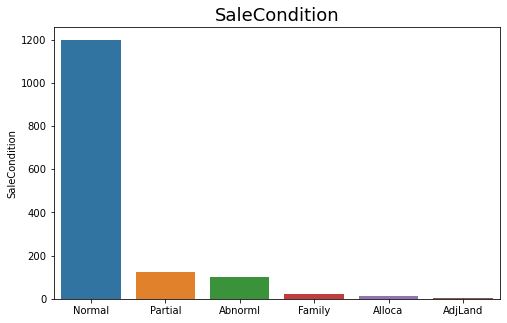

In [20]:
# Visualizing the elements of categorical columns using bar plots
for col in house_obj:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(house_obj[col].value_counts().index, house_obj[col].value_counts())
    plt.show()

### Assess which columns have a skew in values being disproportionately assigned to one element

In [21]:
## Columns that have one value with proportion of >95% in them
drop_col = []
for col in house_obj:
    if pd.DataFrame(house_obj[[col]].value_counts(normalize=True))[0].iloc[0]>0.95:
        print(col)
        drop_col.append(col)

Street
Utilities
Condition2
RoofMatl
Heating
PoolQC
MiscFeature


Columns above have disproportionate variable skew and hence can be dropped

In [22]:
drop_col

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'PoolQC',
 'MiscFeature']

In [23]:
#Dropping the disprop columns
house.drop(drop_col,inplace=True,axis=1)

### EDA - Numerical variables

<AxesSubplot:>

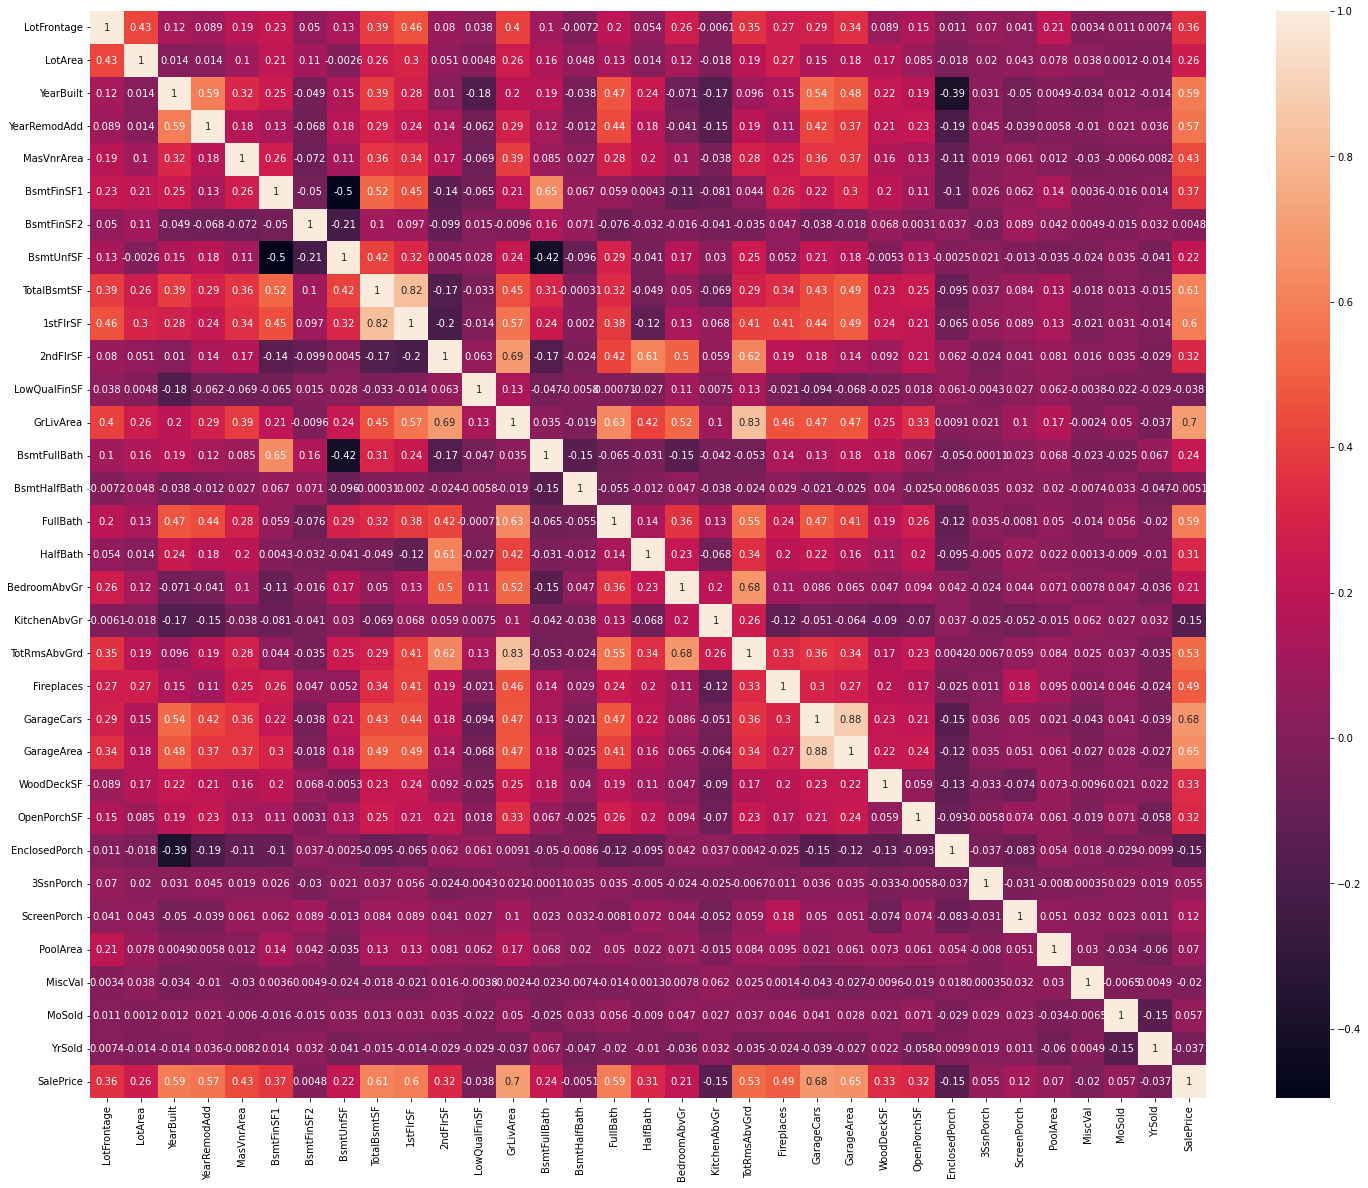

In [24]:
##Looking at the correlation heatmap for a preliminary assessment
plt.figure(figsize=(25,20))
sns.heatmap(house.corr(),annot=True)

<b>Observations</b>:
1. Many Columns reflect multicollinearity.
2. There are columns deeply related SalesPrice.

In [25]:
##Focussing on the Target Variable's correlation matrices
house.corr()[['SalePrice']].sort_values('SalePrice',ascending=False).head()

,SalePrice
SalePrice,1.000000
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134


SalePrice is highly correlated with `GrLivArea`, `GarageCars`,`GarageArea` and `TotalBsmtSF`

## -----------------------------------------------------------------------------------------------------------

## 3. Treating outliers and Missing Values. <a id='miss_val'></a>

> Outlier detection

In [26]:
house_num_ = house.select_dtypes(include = ['int64', 'float64'])

In [27]:
house_num_.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


<AxesSubplot:>

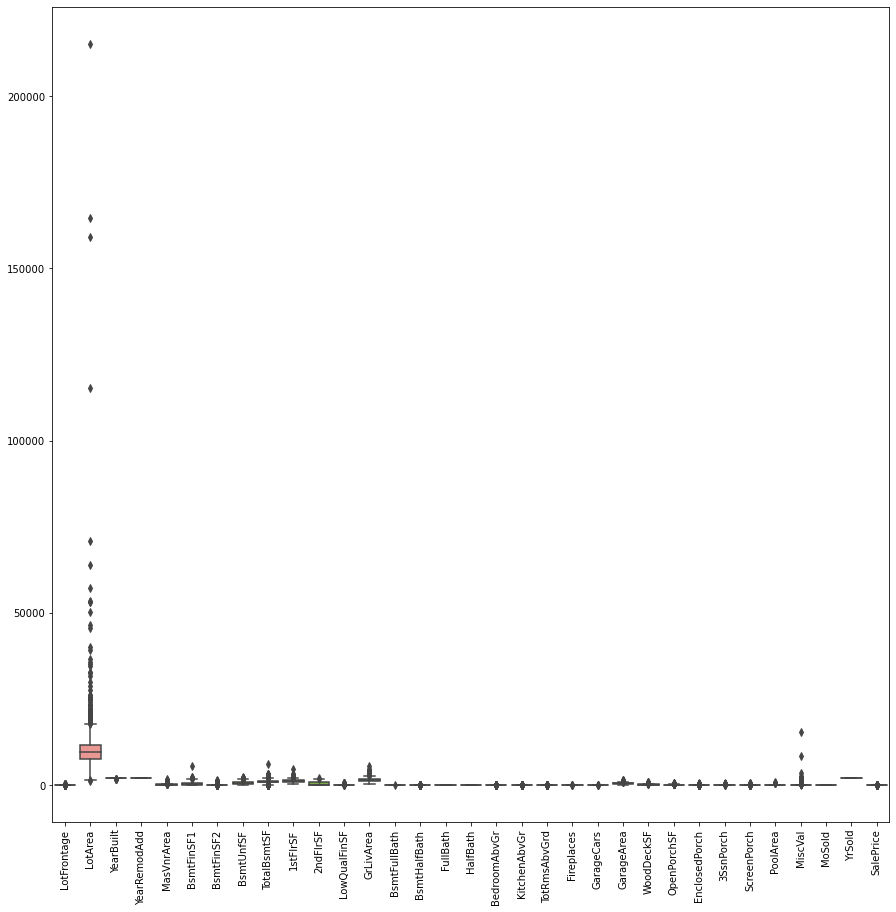

In [28]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=house_num_)

In [29]:
house.LotFrontage.describe(percentiles=[0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
50%        69.000000
75%        80.000000
80%        85.000000
90%        96.000000
91%        98.000000
92%       100.000000
93%       100.000000
94%       104.000000
95%       107.000000
96%       110.000000
97%       120.000000
98%       124.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

> Outlier Treatment

for good measure we can cap values to 5% Lower and 95% upper bound in every numeric colummn

In [30]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in house_num_.columns:
    house_num_[col][house_num_[col] <= house_num_[col].quantile(0.05)] = house_num_[col].quantile(0.05)
    house_num_[col][house_num_[col] >= house_num_[col].quantile(0.95)] = house_num_[col].quantile(0.95)

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

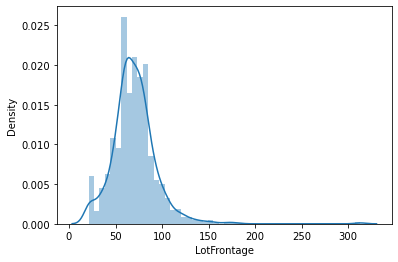

In [31]:
sns.distplot(house['LotFrontage'])

It's normalized now hence the mean will not be skewed, can be safely imputed now

> Missing Value treatment

In [32]:
#stated above the two columns with missing values were 'LotFrontage', 'MasVnrArea'
Missed_val = house_num_['LotFrontage'].count()/len(house_num_)
Missed_val = 1-Missed_val
print(f'{Missed_val:.1%} Missed')

17.7% Missed


In [33]:
#imputing mean
house_num_['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace=True)

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

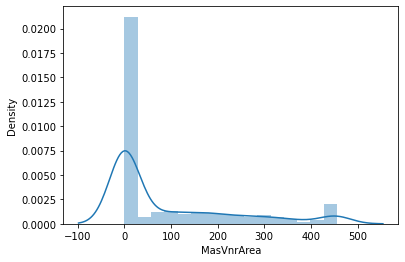

In [34]:
# Analyzing 'Mason Veneer Area'
sns.distplot(house_num_['MasVnrArea'])

`A large skew towards zero`

In [35]:
house_num_['MasVnrArea'].mean()

92.55509641873279

In [36]:
house_num_['MasVnrArea'].describe()

count    1452.000000
mean       92.555096
std       140.811013
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max       456.000000
Name: MasVnrArea, dtype: float64

This column has a lot of zeros hence can be dropped for maintaining data sanity

In [37]:
house_num_.drop('MasVnrArea',axis=1,inplace=True)

<AxesSubplot:>

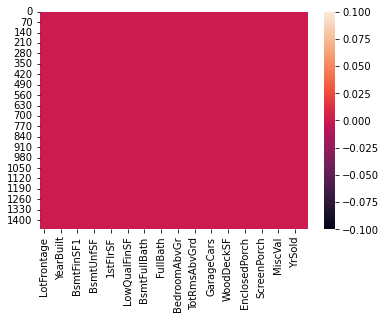

In [38]:
# Checking for missing values again 
sns.heatmap(house_num_.isna())

Missing values are clear as day!

## Dummy variable creation

#### Dummy variables - Categorical Variables

In [39]:
house_obj = house.select_dtypes(include='object')

In [40]:
house_obj.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,60,RL,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,NA,Attchd,2003,RFn,TA,TA,Y,NA,WD,Normal
1,20,RL,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,TA,Attchd,1976,RFn,TA,TA,Y,NA,WD,Normal
2,60,RL,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,TA,Attchd,2001,RFn,TA,TA,Y,NA,WD,Normal
3,70,RL,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,Gd,Detchd,1998,Unf,TA,TA,Y,NA,WD,Abnorml
4,60,RL,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,TA,Attchd,2000,RFn,TA,TA,Y,NA,WD,Normal


In [41]:
house_obj_encod = pd.get_dummies(house_obj, drop_first=True)
house_obj_encod.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
house = pd.concat([house_num_, house_obj_encod], axis=1)


## View the first few rows of our dataframe
house.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,2003,706,0.0,150,856.0,856.0,854.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,1976,978,0.0,284,1262.0,1262.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2001,2002,486,0.0,434,920.0,920.0,866.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1916,1970,216,0.0,540,756.0,961.0,756.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,2000,655,0.0,490,1145.0,1145.0,1053.0,...,0,0,0,0,1,0,0,0,1,0


## ---------------------------------------------------------------------------------------------------------

## 2. Feature Engineering. <a id='feature_engg'></a>

> Adding Column

In [43]:
# Inferring the age of the house based on the year sold and year built
house['age'] = house['YrSold'] - house['YearBuilt']

In [44]:
house.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,age
0,65.0,8450.0,2003,2003,706,0.0,150,856.0,856.0,854.0,...,0,0,0,1,0,0,0,1,0,5
1,80.0,9600.0,1976,1976,978,0.0,284,1262.0,1262.0,0.0,...,0,0,0,1,0,0,0,1,0,31
2,68.0,11250.0,2001,2002,486,0.0,434,920.0,920.0,866.0,...,0,0,0,1,0,0,0,1,0,7
3,60.0,9550.0,1916,1970,216,0.0,540,756.0,961.0,756.0,...,0,0,0,1,0,0,0,0,0,90
4,84.0,14260.0,2000,2000,655,0.0,490,1145.0,1145.0,1053.0,...,0,0,0,1,0,0,0,1,0,8


`age` columns reflects the Age in year

In [45]:
#Dropping the columns to avoid relationship conflict
house.drop(['YrSold','YearBuilt'],axis=1,inplace=True)

## ---------------------------------------------------------------------------------------------------------

# 4. Building Models <a id='model_build'></a>

Building the model contains following series of tasks:
1. Splitting the data (into test and train)
2. Scaling Variables.
3. Build Model using Ridge Regression.
4. Build Model using Lasso Regression.

In [46]:
# X - Independent vars
X = house.drop(["SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,age
0,65.0,8450.0,2003,706,0.0,150,856.0,856.0,854.0,0,...,0,0,0,1,0,0,0,1,0,5
1,80.0,9600.0,1976,978,0.0,284,1262.0,1262.0,0.0,0,...,0,0,0,1,0,0,0,1,0,31
2,68.0,11250.0,2002,486,0.0,434,920.0,920.0,866.0,0,...,0,0,0,1,0,0,0,1,0,7
3,60.0,9550.0,1970,216,0.0,540,756.0,961.0,756.0,0,...,0,0,0,1,0,0,0,0,0,90
4,84.0,14260.0,2000,655,0.0,490,1145.0,1145.0,1053.0,0,...,0,0,0,1,0,0,0,1,0,8


In [47]:
# Y - Target
y = house["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [48]:
# Splitting X and y into 70% train data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

print("Train Independent Dimesions: ",X_train.shape)
print("Train Target Dimesions: ",y_train.shape)
print("Test Independent Dimesions: ",X_test.shape)
print("Test Target Dimesions: ",y_test.shape)

Train Independent Dimesions:  (1022, 355)
Train Target Dimesions:  (1022,)
Test Independent Dimesions:  (438, 355)
Test Target Dimesions:  (438,)


Means we have a clean 70-30 split

In [49]:
# Scaling the numerics
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Create a scaler instance
scaler = StandardScaler()

# Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [50]:
#Creating function forStoring results:
def results_cv(y_train, y_train_pred, y_test, y_pred):
    results = []

    results.append(np.sum(np.square(y_train - y_train_pred)))#RSS
    results.append(np.sum(np.square(y_test - y_pred))) #RSS
                   
    results.append(r2_score(y_train, y_train_pred))#r2 Score
    results.append(r2_score(y_test, y_pred))#r2 Score
                   
                   
    results.append(mean_squared_error(y_train, y_train_pred)) #Mean squared error
    results.append(mean_squared_error(y_test, y_pred))# Mean squared error
                   
                   
    results.append(mean_squared_error(y_train, y_train_pred)**0.5)#RMSE
    results.append(mean_squared_error(y_test, y_pred)**0.5) #RMSE
    
    print(f'RSS (Train) = {np.sum(np.square(y_train - y_train_pred)):.2f}')
    print(f'RSS (Test) = {np.sum(np.square(y_test - y_pred)):.2f}')
    print(f'R2 (Train) = {r2_score(y_train, y_train_pred):.1%}')
    print(f'R2 (Test) = {r2_score(y_test, y_pred):.1%}')
    print(f'RMSE (Train) = {mean_squared_error(y_train, y_train_pred)**0.5:.2f}')
    print(f'RMSE (Test) = {mean_squared_error(y_test, y_pred)**0.5:.2f}')
    
    return results

### Building Ridge Regression model:

In [51]:
# Creating on a list of alphas to find the optimum value of alpha through cross validation

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.03859639, 0.04225793, 0.0413476 , 0.03246579, 0.02758021,
        0.02777395, 0.02610831, 0.02570181, 0.02946362, 0.02811737,
        0.02568474, 0.02608452, 0.02543793, 0.02539058, 0.02643976,
        0.03525286, 0.0348454 , 0.03108721, 0.03290434, 0.02734776,
        0.03239822, 0.03176622, 0.02953186, 0.0294838 , 0.04068589,
        0.03978615, 0.04006457, 0.02968545]),
 'std_fit_time': array([0.00268846, 0.00366912, 0.00507473, 0.00387719, 0.00191503,
        0.00284326, 0.00213859, 0.0012123 , 0.00285308, 0.00220414,
        0.00072929, 0.00151446, 0.00393726, 0.00296474, 0.00286992,
        0.00792192, 0.00889242, 0.00333148, 0.00747576, 0.00390923,
        0.00439299, 0.00582717, 0.00247239, 0.00437593, 0.00545109,
        0.00259283, 0.00397102, 0.00358103]),
 'mean_score_time': array([0.01026073, 0.00997977, 0.00923886, 0.00845523, 0.00849729,
        0.00790143, 0.00764189, 0.00738196, 0.00818839, 0.00846319,
        0.00790544, 0.00766234, 0.007845

In [53]:
ridgeCV.best_params_

{'alpha': 10.0}

> Creating ridge with optimum alpha = 10.0 as described above

In [54]:
ridge = Ridge(alpha=10)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [55]:
ridge.coef_[:5] #overview of coefficients

array([0.00621307, 0.02089066, 0.0227196 , 0.00718709, 0.00121154])

#### Making Predictions through Ridge:

In [56]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [57]:
ridge_results = results_cv(y_train, y_train_pred, y_test, y_pred)

RSS (Train) = 7.38
RSS (Test) = 4.69
R2 (Train) = 94.2%
R2 (Test) = 91.3%
RMSE (Train) = 0.08
RMSE (Test) = 0.10


In [58]:
# Storing ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038596,0.002688,0.010261,0.001348,0.0001,{'alpha': 0.0001},-0.100705,-0.080018,-0.118816,-0.092044,...,-0.100152,0.013426,27,-0.049495,-0.051925,-0.047851,-0.051807,-0.048546,-0.049925,0.001669
1,0.042258,0.003669,0.009980,0.000888,0.001,{'alpha': 0.001},-0.100141,-0.079960,-0.117722,-0.091985,...,-0.099476,0.012930,26,-0.049509,-0.051930,-0.047860,-0.051807,-0.048624,-0.049946,0.001654
2,0.041348,0.005075,0.009239,0.001946,0.01,{'alpha': 0.01},-0.098992,-0.079324,-0.114884,-0.091429,...,-0.097613,0.011890,25,-0.049637,-0.051984,-0.047968,-0.051803,-0.048905,-0.050059,0.001589
3,0.032466,0.003877,0.008455,0.000799,0.05,{'alpha': 0.05},-0.097248,-0.077695,-0.111751,-0.089433,...,-0.095041,0.011249,24,-0.049894,-0.052210,-0.048168,-0.051868,-0.049352,-0.050299,0.001531
4,0.027580,0.001915,0.008497,0.000574,0.1,{'alpha': 0.1},-0.095186,-0.077447,-0.109228,-0.087741,...,-0.093187,0.010475,22,-0.050208,-0.052439,-0.048377,-0.052093,-0.049740,-0.050571,0.001513
5,0.027774,0.002843,0.007901,0.000241,0.2,{'alpha': 0.2},-0.092142,-0.077157,-0.105540,-0.085351,...,-0.090657,0.009381,21,-0.050701,-0.052824,-0.048756,-0.052476,-0.050289,-0.051009,0.001492
6,0.026108,0.002139,0.007642,0.000151,0.3,{'alpha': 0.3},-0.089908,-0.076861,-0.102796,-0.083682,...,-0.088880,0.008618,20,-0.051082,-0.053151,-0.049061,-0.052773,-0.050686,-0.051351,0.001484
7,0.025702,0.001212,0.007382,0.000191,0.4,{'alpha': 0.4},-0.088197,-0.076561,-0.100808,-0.082337,...,-0.087535,0.008113,19,-0.051439,-0.053412,-0.049321,-0.053032,-0.051017,-0.051644,0.001475
8,0.029464,0.002853,0.008188,0.000499,0.5,{'alpha': 0.5},-0.086847,-0.076328,-0.099206,-0.081286,...,-0.086480,0.007710,18,-0.051736,-0.053638,-0.049555,-0.053268,-0.051288,-0.051897,0.001469
9,0.028117,0.002204,0.008463,0.000782,0.6,{'alpha': 0.6},-0.085744,-0.076086,-0.097925,-0.080414,...,-0.085618,0.007412,17,-0.052004,-0.053858,-0.049774,-0.053469,-0.051519,-0.052125,0.001464


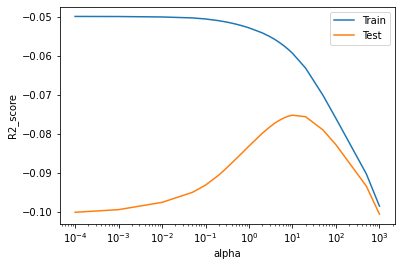

In [59]:
# Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

`At alpha=10.0, the Graph has achieved an optimum value as depicted by Cross validation`

### Building Ridge Regression model:

In [60]:
# Creating on a list of alphas to find the optimum value of alpha through cross validation

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
lassoCV.cv_results_

{'mean_fit_time': array([0.11651487, 0.05388093, 0.03310895, 0.03406539, 0.02638044,
        0.02487297, 0.02254248, 0.01789861, 0.01588955, 0.01665921,
        0.0156641 , 0.01531563, 0.01666217, 0.0175889 , 0.01540194,
        0.01544919, 0.01622024, 0.01564488, 0.01502833, 0.01500363,
        0.01534839, 0.01637039, 0.01597314, 0.01676598, 0.01618214,
        0.01680779, 0.01675873, 0.01506009]),
 'std_fit_time': array([0.03674207, 0.01351929, 0.00248489, 0.00339546, 0.00365726,
        0.00395547, 0.00246743, 0.00264143, 0.00051075, 0.00103226,
        0.00043883, 0.00043053, 0.00135236, 0.00314986, 0.00037122,
        0.0001941 , 0.00169111, 0.00067431, 0.00087853, 0.00118264,
        0.00065783, 0.00043607, 0.00108176, 0.00182401, 0.00085372,
        0.0008959 , 0.00032462, 0.00074948]),
 'mean_score_time': array([0.00973487, 0.01318779, 0.01270928, 0.01218872, 0.01007137,
        0.01286435, 0.0091701 , 0.00782714, 0.00824661, 0.00735569,
        0.00825362, 0.00722771, 0.007992

In [62]:
lassoCV.best_params_

{'alpha': 0.001}

> Creating a Lasso regression with Alpha value 0.001

In [63]:
lasso = Lasso(alpha=0.001)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [64]:
lasso.coef_[:5]

array([0.00411985, 0.02317203, 0.02849433, 0.01440003, 0.        ])

#### Making Predictions through Lasso:

In [65]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [66]:
lasso_results = results_cv(y_train, y_train_pred, y_test, y_pred)

RSS (Train) = 9.37
RSS (Test) = 4.84
R2 (Train) = 92.6%
R2 (Test) = 91.1%
RMSE (Train) = 0.10
RMSE (Test) = 0.11


In [67]:
# Storing ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.116515,0.036742,0.009735,0.001604,0.0001,{'alpha': 0.0001},-0.082183,-0.074216,-0.093012,-0.073094,...,-0.080996,0.007161,2,-0.054063,-0.055929,-0.052485,-0.055843,-0.053429,-0.054350,0.001351
1,0.053881,0.013519,0.013188,0.005865,0.001,{'alpha': 0.001},-0.071412,-0.071131,-0.081892,-0.072963,...,-0.075166,0.004270,1,-0.068278,-0.067885,-0.066220,-0.068143,-0.065298,-0.067165,0.001191
2,0.033109,0.002485,0.012709,0.002672,0.01,{'alpha': 0.01},-0.091655,-0.085339,-0.108567,-0.099035,...,-0.097904,0.008499,3,-0.097281,-0.097764,-0.091967,-0.094938,-0.093913,-0.095173,0.002149
3,0.034065,0.003395,0.012189,0.003401,0.05,{'alpha': 0.05},-0.111850,-0.109947,-0.128874,-0.120092,...,-0.120120,0.008281,4,-0.120863,-0.122115,-0.116780,-0.118224,-0.117070,-0.119010,0.002118
4,0.026380,0.003657,0.010071,0.002347,0.1,{'alpha': 0.1},-0.149088,-0.152265,-0.166022,-0.156765,...,-0.158237,0.007208,5,-0.159056,-0.159620,-0.155391,-0.156256,-0.154797,-0.157024,0.001954
5,0.024873,0.003955,0.012864,0.000626,0.2,{'alpha': 0.2},-0.240119,-0.247701,-0.259657,-0.247630,...,-0.251052,0.007737,6,-0.250640,-0.253185,-0.247744,-0.249581,-0.247469,-0.249723,0.002090
6,0.022542,0.002467,0.009170,0.001219,0.3,{'alpha': 0.3},-0.280426,-0.286766,-0.299123,-0.287978,...,-0.291119,0.007886,7,-0.292654,-0.290875,-0.288281,-0.291098,-0.287887,-0.290159,0.001806
7,0.017899,0.002641,0.007827,0.000659,0.4,{'alpha': 0.4},-0.280426,-0.286766,-0.299123,-0.287978,...,-0.291119,0.007886,7,-0.292654,-0.290875,-0.288281,-0.291098,-0.287887,-0.290159,0.001806
8,0.015890,0.000511,0.008247,0.000580,0.5,{'alpha': 0.5},-0.280426,-0.286766,-0.299123,-0.287978,...,-0.291119,0.007886,7,-0.292654,-0.290875,-0.288281,-0.291098,-0.287887,-0.290159,0.001806
9,0.016659,0.001032,0.007356,0.000308,0.6,{'alpha': 0.6},-0.280426,-0.286766,-0.299123,-0.287978,...,-0.291119,0.007886,7,-0.292654,-0.290875,-0.288281,-0.291098,-0.287887,-0.290159,0.001806


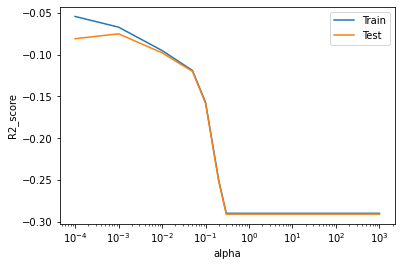

In [68]:
# Plotting R2 against Alpha
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

`The train test error decrease with increase Alpha but remain constant after 0.05`

## ---------------------------------------------------------------------------------------------------------

## 6. Comparing Models <a id='model_compare'></a>

In [69]:
# Creating a dataframe which contain all the results

results_table = {'Results': ['RSS (Train)','RSS (Test)','R2 (Train)','R2 (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_results,
            'Lasso Regression' : lasso_results
        }

final_metric = pd.DataFrame(results_table, columns = ['Results', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Results')

,Ridge Regression,Lasso Regression
Results,,
RSS (Train),7.378217,9.373043
RSS (Test),4.691668,4.840375
R2 (Train),0.942095,0.926439
R2 (Test),0.913275,0.910526
MSE (Train),0.007219,0.009171
MSE (Test),0.010712,0.011051
RMSE (Train),0.084967,0.095767
RMSE (Test),0.103497,0.105124


### R2 Score for Ridge is slightly higher - 0.94

In [70]:
# To see the changes in coefficients after regularization 
# we first create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
BsmtFinSF1
BsmtFinSF2
...
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal
SaleCondition_Partial


In [71]:
# fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
LotFrontage,0.006213,0.004120
LotArea,0.020891,0.023172
YearRemodAdd,0.022720,0.028494
BsmtFinSF1,0.007187,0.014400
BsmtFinSF2,0.001212,0.000000
...,...,...
SaleCondition_Alloca,0.007652,-0.000000
SaleCondition_Family,-0.023345,-0.000000
SaleCondition_Normal,0.058538,0.050572
SaleCondition_Partial,0.023532,0.000000


#### Features eliminated by Lasso

In [72]:
betas[betas['Lasso']==0].index

Index(['BsmtFinSF2', '1stFlrSF', 'LowQualFinSF', 'BsmtHalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', '3SsnPorch', 'PoolArea',
       'MiscVal',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=274)

#### Number of Features eliminated by Lasso

In [73]:
len(betas[betas['Lasso']==0].index)

274

### 274 out of 355 features were removed by lasso regression - Accounting to almost 77% of all features

#### Features picked by Lasso

In [74]:
betas['Lasso'].loc[betas['Lasso']!=0]

LotFrontage             0.004120
LotArea                 0.023172
YearRemodAdd            0.028494
BsmtFinSF1              0.014400
BsmtUnfSF              -0.011993
                          ...   
PavedDrive_Y            0.012910
Fence_NA                0.001137
SaleType_New            0.046671
SaleCondition_Normal    0.050572
age                    -0.052890
Name: Lasso, Length: 81, dtype: float64

## Now finally picking top influencing features according to both Ridge and Lasso

In [75]:
# Ridge Coeff
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.080256
Neighborhood_Crawfor    0.078044
OverallQual_9           0.074074
OverallCond_9           0.072914
OverallQual_8           0.070455
SaleCondition_Normal    0.058538
Functional_Typ          0.055941
TotalBsmtSF             0.055041
BsmtCond_Gd             0.054076
Exterior1st_BrkFace     0.053850
Name: Ridge, dtype: float64

In [76]:
# Interpreting the ridge coefficients in terms of target,by taking inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.083564
Neighborhood_Crawfor    1.081170
OverallQual_9           1.076887
OverallCond_9           1.075638
OverallQual_8           1.072997
SaleCondition_Normal    1.060285
Functional_Typ          1.057535
TotalBsmtSF             1.056584
BsmtCond_Gd             1.055565
Exterior1st_BrkFace     1.055327
Name: Ridge, dtype: float64

In [77]:
# Lasso Coeff
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.116100
GrLivArea               0.099800
OverallQual_8           0.093517
Neighborhood_Crawfor    0.082973
Functional_Typ          0.061172
TotalBsmtSF             0.057909
Exterior1st_BrkFace     0.051658
SaleCondition_Normal    0.050572
SaleType_New            0.046671
BsmtCond_Gd             0.041998
Name: Lasso, dtype: float64

In [78]:
# Interpreting the ridge coefficients in terms of target,by taking inverse log (i.e. e to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.123108
GrLivArea               1.104950
OverallQual_8           1.098029
Neighborhood_Crawfor    1.086512
Functional_Typ          1.063082
TotalBsmtSF             1.059619
Exterior1st_BrkFace     1.053016
SaleCondition_Normal    1.051873
SaleType_New            1.047777
BsmtCond_Gd             1.042893
Name: Lasso, dtype: float64

## ---------------------------------------------------------------------------------------------------------

## 7. Final Interpretation and Results <a id='result_inter'></a>

In [79]:
lasso_features = pd.DataFrame(lasso_coeffs.sort_values(ascending=False)[:10])
ridge_features = pd.DataFrame(ridge_coeffs.sort_values(ascending=False)[:10])

In [80]:
pd.concat([lasso_features,ridge_features],axis=1)

,Lasso,Ridge
OverallQual_9,1.123108,1.076887
GrLivArea,1.104950,1.083564
OverallQual_8,1.098029,1.072997
Neighborhood_Crawfor,1.086512,1.081170
Functional_Typ,1.063082,1.057535
TotalBsmtSF,1.059619,1.056584
Exterior1st_BrkFace,1.053016,1.055327
SaleCondition_Normal,1.051873,1.060285
SaleType_New,1.047777,NaN
BsmtCond_Gd,1.042893,1.055565


## The depicted important features are:

`'OverallQual_9'& 'OverallQual_8'` - if the overall material and finish of the house is **Very Good** or **Excellent**, the price of house will increase by 1.08 to 1.12 times<br>
`GrLivArea` - an increase of 1 square foot of house area above ground, the price will increase by 1.08 to 1.1 times<br>
`'Neighborhood_Crawfor'` - **Crawfor** Neighborhood predicts an increase by a factor of 1.08 <br>
`'Functional_Typ'`- **Typical Functionality** homes resonate with an increase of 1.06 times the house price<br>
`'TotalBsmtSF'`- Size of the basement impact the house price by 1.06 times<br>
`'Exterior1st_BrkFace'`- if the exterior covering on the house is **Brick Face**, the price of house will increase by 1.06 times.<br>
`'SaleCondition_Normal'`- **Normal** sale house has an impact of 1.05 to 1.06 times on the price of the house<br> 
`'BsmtCond_Gd'`- **Good** condition house depict the pricing by a factor of 1.04 to 1.05 times<br>


## ---------------------------------------------------------------------------------------------------------

## ---------------------------------------------------------------------------------------------------------

## ---------------------------------------------------------------------------------------------------------

Q3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [81]:
lasso_coeffs.sort_values(ascending=False)

OverallQual_9           1.123108
GrLivArea               1.104950
OverallQual_8           1.098029
Neighborhood_Crawfor    1.086512
Functional_Typ          1.063082
                          ...   
MSSubClass_160          0.952006
OverallCond_4           0.948849
age                     0.948485
OverallQual_4           0.937139
OverallCond_3           0.904996
Name: Lasso, Length: 355, dtype: float64

In [82]:
# Top 5 lasso predictors that are to be removed
top_preds = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Functional_Typ']

In [83]:
# dropping them from train and test data
X_train_dropped = X_train.drop(top_preds, axis=1)
X_test_dropped = X_test.drop(top_preds, axis=1)

In [84]:
# Running a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [86]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

#### Making Predictions

In [87]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [88]:
# Check results
lasso_results = results_cv(y_train, y_train_pred, y_test, y_pred)

RSS (Train) = 10.45
RSS (Test) = 5.47
R2 (Train) = 91.8%
R2 (Test) = 89.9%
RMSE (Train) = 0.10
RMSE (Test) = 0.11


In [89]:
# Creating a dataframe which contain all the results

results_table = {'Results': ['RSS (Train)','RSS (Test)','R2 (Train)','R2 (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_results
        }

final_metric = pd.DataFrame(results_table, columns = ['Results', 'Lasso Regression'] )
final_metric.set_index('Results')

,Lasso Regression
Results,
RSS (Train),10.454930
RSS (Test),5.468515
R2 (Train),0.917948
R2 (Test),0.898915
MSE (Train),0.010230
MSE (Test),0.012485
RMSE (Train),0.101143
RMSE (Test),0.111737


In [90]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
BsmtFinSF1
BsmtFinSF2
...
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal
SaleCondition_Partial


In [91]:
betas['Lasso'] = lasso.coef_
betas

,Lasso
LotFrontage,0.003418
LotArea,0.024805
YearRemodAdd,0.027183
BsmtFinSF1,0.020959
BsmtFinSF2,0.000000
...,...
SaleCondition_Alloca,0.000000
SaleCondition_Family,-0.000000
SaleCondition_Normal,0.048217
SaleCondition_Partial,0.000000


In [92]:
## New top 5 features
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF               0.088648
Exterior1st_BrkFace    0.067311
TotalBsmtSF            0.063054
1stFlrSF               0.058672
MSSubClass_70          0.053194
Name: Lasso, dtype: float64

## --------------------------------------End of Analysis---------------------------------------------------